# General Notebook

In [1]:
seed = 123
import os
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torchsummary import summary
import random
import torch
random.seed(seed)     # python random generator
np.random.seed(seed)  # numpy random generator

torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


In [2]:

# Change the name to create or load the data and models
path = os.getcwd()
folder_data = r'Data\data_mlsp_semi'
#-------------------------------
if torch.cuda.is_available():  
    device = "cuda:0" 
else:  
    device = "cpu"  
print(device)

cpu


## Data

In [3]:
#--------------------------------------------
# 0: Vaquita girada
# 1: Cow     2: Human 
# 3: Horse   4: Camel
# 5: Dog1    6: Dog2
idx  = 4 #! Id image
p = 60 #! porcentage of missing labels  options: [40, 60, 80, 100]
names = ['bull', 'cow', 'human', 'horse', 'camel', 'dog1', 'dog2']
name_image = names[idx]+str(p)
print(name_image)

camel60


In [4]:
#!  Pay attention to idx when we read the data 
x1 = plt.imread(os.path.join(path, folder_data, 'x{}.png'.format(idx+1)))
m, n = x1.shape
y_true = plt.imread(os.path.join(path, folder_data, 'y{}.png'.format(idx+1))).reshape(m*n, 1)
y1 =  np.load(os.path.join(path, folder_data, 'y_miss_{}.npy'.format(p)))[idx].reshape(m*n, 1)
x = torch.tensor(x1.reshape(m*n, 1), dtype=torch.float32)
y = torch.tensor(y1, dtype=torch.float32)
x = x.to(device)
y = y.to(device)

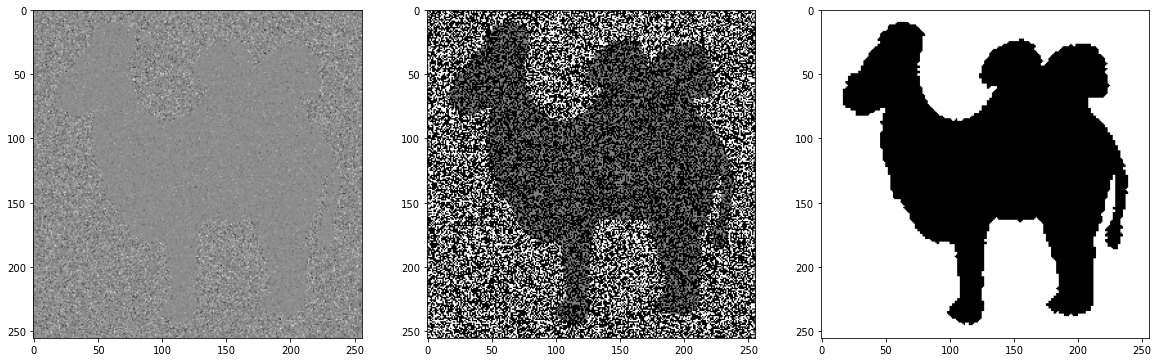

In [5]:
fig = plt.figure(figsize=(20, 30))  
rows = 1
columns = 3
fig.add_subplot(rows, columns, 1)
plt.imshow(x1, cmap='gray')
fig.add_subplot(rows, columns, 2)
plt.imshow(y1.reshape(m,n), cmap='gray')
fig.add_subplot(rows, columns, 3)
plt.imshow(y_true.reshape(m,n), cmap='gray')

## Functions and models

In [35]:
# from models.SVRNN import SVRNN
# from models.SVRNN_2 import SVRNN_2
# from models.VSL import VSL
# from models.TMM import TMM
# from models.TMM_3 import TMM_3, TMM_3v2
from models.models_v3 import SVRNN, VSL, TMM
from utils.training import final_model, run_model_seq, num_param, plot_loss_epoch

# Models

In [17]:
# General Parameters (we do not change the values of these parameters during the simulations)
x_dim = 1
y_dim = 1
# Parameters for the models
learning_rate = 0.007 # ! We can change this parameter but change the information in the sheet annotation
weight_decay_ = 1e-4
n_epochs = 100
clip = 10
# Parameters for printing and saving the results
#! Change this path for your own path to save the results 
print_every = 1
save_every = 5
# general_path  = os.path.join(os.getcwd(), 'Results_save_models') #! Any
general_path = r'C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models' #! University
# general_path = r"C:\Users\katyt\Desktop\PhD\MLSP 2023\Results_save_models" #! Home
print('Saving our model in',general_path)


Saving our model in C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models


## VLS

In [18]:
# Dimension of latent variables
z_dim = 1
h_dim = 14#None # This value is not necessary for the TMM model but we need to define it for TMM_3
num_neurons = 30 #? == h_dim?
add_loss = False
#--------------------------------------------
#! Change here if the model is the same but with different parameters
setting = '_l{}'.format(int(add_loss))+'' #* Change to '', '_1', '_2', etc. if the model is the same but with different parameters
#--------------------------------------------
# model = TMM(x_dim, z_dim, y_dim, num_neurons, device, add_loss)
model = VSL( x_dim, z_dim, y_dim, h_dim, num_neurons, device)
#--------------------------------------------
# Save models
#--------------------------------------------
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay= weight_decay_)
print(f'{model.__class__.__name__ } has {num_param(model)} parameters to train' )
print(f'z_dim = {z_dim}, num_neurons = {num_neurons}, h_dim = {h_dim}')
data = model.__class__.__name__.casefold()+'_'+name_image+setting
path_save = os.path.join(general_path, data)
if not os.path.exists(path_save):
    os.makedirs(path_save)
print(f'Actual path to save our models for {data} is \n {path_save} ')



VSL has 1477 parameters to train
z_dim = 1, num_neurons = 30, h_dim = 14
Actual path to save our models for vsl_camel60_l0 is 
 C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models\vsl_camel60_l0 


In [12]:
#* Training
#* epoch_init = 1 by default
loss = run_model_seq(x, y,model,optimizer,clip, path_save, n_epochs,save_every, print_every)

The model is saved in this path C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models\vsl_camel60_l0\vsl


c:\Users\kmorales\Google Drive\PhD\Simulations_semi_super\utils\training.py:67: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  nn.utils.clip_grad_norm(model.parameters(), clip)


Loss Labeled: 17922.734375 	 Loss Unlabeled: 15787.961914
Loss Labeled: 17865.958984 	 Loss Unlabeled: -7228.686035
Loss Labeled: 17825.630859 	 Loss Unlabeled: -23516.400391
Loss Labeled: 17808.785156 	 Loss Unlabeled: -33806.335938
Loss Labeled: 17801.460938 	 Loss Unlabeled: -39762.039062
Loss Labeled: 17798.500000 	 Loss Unlabeled: -44044.734375
Loss Labeled: 17800.201172 	 Loss Unlabeled: -48420.667969
Loss Labeled: 17802.556641 	 Loss Unlabeled: -52703.941406
Loss Labeled: 17812.238281 	 Loss Unlabeled: -56918.398438
Loss Labeled: 17810.980469 	 Loss Unlabeled: -60852.304688
Loss Labeled: 17806.443359 	 Loss Unlabeled: -64514.183594
Loss Labeled: 17800.582031 	 Loss Unlabeled: -67932.476562
Loss Labeled: 17796.527344 	 Loss Unlabeled: -70979.859375
Loss Labeled: 17796.869141 	 Loss Unlabeled: -73777.976562
Loss Labeled: 17796.083984 	 Loss Unlabeled: -76648.132812
Loss Labeled: 17797.822266 	 Loss Unlabeled: -79704.156250
Loss Labeled: 17800.841797 	 Loss Unlabeled: -83321.437500

In [9]:
#* Training
#* epoch_init = 1 by default
loss = run_model_seq(x, y,model,optimizer,clip, path_save, n_epochs,save_every, print_every)

The model is saved in this path C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models\vsl_camel60_l0\vsl


c:\Users\kmorales\Google Drive\PhD\Simulations_semi_super\utils\training.py:67: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  nn.utils.clip_grad_norm(model.parameters(), clip)


Loss Labeled: 18289.423828 	 Loss Unlabeled: -51666.703125
Loss Labeled: 18195.019531 	 Loss Unlabeled: -62701.550781
Loss Labeled: 18094.457031 	 Loss Unlabeled: -71030.171875
Loss Labeled: 18066.486328 	 Loss Unlabeled: -77300.437500
Loss Labeled: 17982.408203 	 Loss Unlabeled: -81525.578125
Loss Labeled: 17929.703125 	 Loss Unlabeled: -84415.867188
Loss Labeled: 17887.804688 	 Loss Unlabeled: -87446.476562
Loss Labeled: 17863.406250 	 Loss Unlabeled: -91281.703125
Loss Labeled: 17896.810547 	 Loss Unlabeled: -95938.140625
Loss Labeled: 17864.412109 	 Loss Unlabeled: -101622.023438
Loss Labeled: 17864.306641 	 Loss Unlabeled: -108219.117188
Loss Labeled: 17851.509766 	 Loss Unlabeled: -115067.367188
Loss Labeled: 17866.908203 	 Loss Unlabeled: -121858.687500
Loss Labeled: 17850.664062 	 Loss Unlabeled: -128618.171875
Loss Labeled: 17847.693359 	 Loss Unlabeled: -135722.187500
Loss Labeled: 17829.556641 	 Loss Unlabeled: -143896.218750
Loss Labeled: 17842.109375 	 Loss Unlabeled: -152

In [10]:
#* Training
#* epoch_init = 1 by default
loss = run_model_seq(x, y,model,optimizer,clip, path_save, n_epochs,save_every, print_every)

The model is saved in this path C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models\vsl_camel40_l0\vsl


c:\Users\kmorales\Google Drive\PhD\Simulations_semi_super\utils\training.py:46: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  nn.utils.clip_grad_norm(model.parameters(), clip)


Loss Labeled: 27098.519531 	 Loss Unlabeled: -53887.101562
Loss Labeled: 26952.679688 	 Loss Unlabeled: -76294.023438
Loss Labeled: 26902.351562 	 Loss Unlabeled: -91094.531250
Loss Labeled: 26876.755859 	 Loss Unlabeled: -100020.968750
Loss Labeled: 26863.066406 	 Loss Unlabeled: -104170.585938
Loss Labeled: 26868.666016 	 Loss Unlabeled: -110259.320312
Loss Labeled: 26873.912109 	 Loss Unlabeled: -120095.289062
Loss Labeled: 26864.042969 	 Loss Unlabeled: -131694.578125
Loss Labeled: 26869.638672 	 Loss Unlabeled: -141979.625000
Loss Labeled: 26878.076172 	 Loss Unlabeled: -149720.515625
Loss Labeled: 26883.396484 	 Loss Unlabeled: -158263.359375
Loss Labeled: 26901.162109 	 Loss Unlabeled: -170885.187500
Loss Labeled: 26911.087891 	 Loss Unlabeled: -180383.687500
Loss Labeled: 26913.515625 	 Loss Unlabeled: -181467.328125
Loss Labeled: 26914.669922 	 Loss Unlabeled: -185679.562500
Loss Labeled: 26919.992188 	 Loss Unlabeled: -182231.203125
Loss Labeled: 26907.658203 	 Loss Unlabeled

Actual  path for to initialize our models:  C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models\vsl_camel60_l0
C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models\vsl_camel60_l0\vsl_state_100.pth
Initialization of the VSL model  at epoch 100
loss: -1589.365234375 and epoch: 100


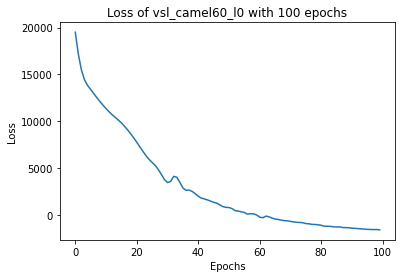

In [19]:
# #* Initialization of the model in an specific epoch
model.to(device)
epoch_init = 100
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay= weight_decay_)
#-----------------------------------------------------
model = final_model(model, optimizer, epoch_init, path_save, device=device)
loss = plot_loss_epoch(model, path_save,data, epoch_init)
#loss = run_model_seq(x, y,model,optimizer,clip, path_save, n_epochs,save_every, print_every, epoch_init)


In [25]:
if y[1] == -1:
    print('We have missing labels')

In [26]:
# #* Reconstruction
y_ = model.reconstruction(x,y)
# y_ = model.sample(x,y).cpu()
y_pred_m = y_[np.where(y1 == -1)].numpy()
y_true_m = y_true[np.where(y1 == -1)]
error_rate = 1-accuracy_score(y_true_m, y_pred_m)
print(f'{name_image}: {model.__class__.__name__ } with  {num_param(model)} parameters \n after {epoch_init} has an error rate of {error_rate}\n folder {data}' )

RuntimeError: Boolean value of Tensor with no values is ambiguous

In [11]:
# #* Reconstruction
y_ = model.reconstruction(x,y)
# y_ = model.sample(x,y).cpu()
y_pred_m = y_[np.where(y1 == -1)].numpy()
y_true_m = y_true[np.where(y1 == -1)]
error_rate = 1-accuracy_score(y_true_m, y_pred_m)
print(f'{name_image}: {model.__class__.__name__ } with  {num_param(model)} parameters \n after {epoch_init} has an error rate of {error_rate}\n folder {data}' )

camel60: VSL with  5383 parameters 
 after 100 has an error rate of 0.4179517796803943
 folder vsl_camel60_l0


## TMM

In [17]:
import torch
from torch import nn
import torch.distributions.normal as Norm
import torch.distributions.kl as KL
import torch.nn.functional as F
from torch.distributions.bernoulli import Bernoulli
import math
from torch.autograd import Variable

EPS = torch.finfo(torch.float).eps 
c = - 0.5 * math.log(2*math.pi)

class TMM_3v2(nn.Module):
    '''
    TMM as the review article (Yohan and Hugo) + add term of SVRNN for labeled data
    '''
    def __init__(self, x_dim, z_dim, y_dim, h_dim, num_neurons,device, add_loss = True, bias = False):
        super(TMM_3v2,self).__init__()
        self.x_dim = x_dim
        self.z_dim = z_dim
        self.device = device
        self.y_dim = y_dim
        self.h_dim = h_dim
        self.add_loss = add_loss
        self.num_neurons = num_neurons
        self.Soft_threshold = nn.Sigmoid()
        self.dropout = nn.Dropout(0.1)
        # Prior p(z_t | z_{t-1}) = N (μt, σt)
        self.prior_z = nn.Sequential( nn.Linear(self.z_dim, self.num_neurons),
                                  nn.ReLU())
        self.prior_z_mean = nn.Linear(self.num_neurons, self.z_dim)
        
        self.prior_z_std = nn.Sequential( nn.Linear (self.num_neurons, self.z_dim), nn.Softplus())
        # Prior p(y_t | y_{t-1}) = Cat (θt) 
        # We will use the sigmoid function to ensure that the logits are positive and only two classes(if not we can use the softmax function)
        self.prior_y = nn.Sequential( nn.Linear(self.y_dim, self.num_neurons ), nn.ReLU())
        self.prior_y_proba = nn.Sequential(nn.Linear(self.num_neurons, self.y_dim), nn.Sigmoid())
        # q(y_t | x_t, h_{t-1}) = Cat (θt)
        self.q_y = nn.Sequential( nn.Linear(self.x_dim + self.h_dim, self.num_neurons), nn.ReLU())
        self.q_y_proba = nn.Sequential(nn.Linear(self.num_neurons, self.y_dim), nn.Sigmoid())
        # Encoder
        # q(z_t | x_t, y_t, h_{t-1}) = N (μt, σt)
        self.enc = nn.Sequential( nn.Linear(self.h_dim + self.x_dim + self.y_dim, self.num_neurons), nn.ReLU())
        
        self.enc_mean = nn.Linear(self.num_neurons, self.z_dim)
        self.enc_std = nn.Sequential( nn.Linear (self.num_neurons, self.z_dim), nn.Softplus())
        # Decoder
        # p(x_t |z_t, y_t) = N (μt, σt)
        self.dec = nn.Sequential( nn.Linear(self.y_dim + self.z_dim , self.num_neurons), nn.ReLU())
        self.dec_mean = nn.Linear(self.num_neurons, self.x_dim)
        self.dec_std = nn.Sequential( nn.Linear (self.num_neurons, self.x_dim),  nn.Softplus())
        # Recurrence
        self.rnn = nn.RNNCell( self.x_dim + self.z_dim + self.y_dim, self.h_dim, bias, nonlinearity='tanh')#nn.GRU( h_dim + x_dim + z_dim + y_dim , h_dim, n_layers)

    def encoder(self, x, y, h):
        enc = self.enc(torch.cat([x, y,h], 0))
        enc = self.dropout(enc) #new
        enc_mean = self.enc_mean(enc)
        enc_std = self.enc_std(enc)
        return enc_mean, enc_std
    
    def decoder(self, z, y):
        dec = self.dec(torch.cat([z, y], 0))
        dec = self.dropout(dec) #new
        dec_mean = self.dec_mean(dec)
        dec_std = self.dec_std(dec)
        return dec_mean, dec_std
    
    def get_cost_labeled(self, x, y, h, zt):
        # zt : z_{t-1}
        prior_zt = self.prior_z(zt)
        prior_zt = self.dropout(prior_zt) #new
        prior_zt_mean = self.prior_z_mean(prior_zt)
        prior_zt_std = self.prior_z_std(prior_zt)
        # Encoder 
        enc_mean, enc_std = self.encoder(x, y, h)
        z_t = self._reparameterized_sample(enc_mean, enc_std)
        # Decoder 
        dec_mean, dec_std = self.decoder(z_t, y)
        # Loss
        kld_loss_l = self._kld_gauss(enc_mean, enc_std, prior_zt_mean, prior_zt_std)
        rec_loss_l = self._rec_gauss(x, dec_mean, dec_std)
        return kld_loss_l, rec_loss_l, z_t
    
    def reconstruction(self, x, y):
        '''
        Complete image
        '''
        h_t = torch.zeros(self.h_dim).to(self.device)
        y_complete = y.clone()
        for t in range(x.size(0)):
            if y[t] != -1:
                y_t =  y[t].clone()
                enc_mean, enc_std = self.encoder(x[t],y_t,h_t)
                z_t = self._reparameterized_sample(enc_mean, enc_std)   
            else:
                q_yt = self.q_y_proba(self.q_y(torch.cat([x[t], h_t ], 0)))
                l_x_t = Bernoulli(q_yt)
                y_t = l_x_t.sample() 

                y_complete[t] = y_t.item() 
                enc_mean, enc_std = self.encoder(x[t],y_t,h_t)
                z_t = self._reparameterized_sample(enc_mean, enc_std)

            h_t = self.rnn(torch.cat([y_t, z_t, x[t]], 0)[None, :], h_t[None, :]).squeeze(0)
            
        return y_complete

    def forward(self, x, y):
        zt = torch.zeros(self.z_dim).to(self.device)
        yt = torch.zeros(self.y_dim).to(self.device)
        h_t = torch.zeros(self.h_dim).to(self.device)
        kld_loss_l, rec_loss_l, y_loss_l, add_term =  4*[0]
        kld_loss_u, rec_loss_u, y_loss_u  = 3*[0]
        for t in range(x.size(0)):
            # Prior
            p_yt = self.prior_y_proba(self.prior_y(yt))
            # p_yt = self.dropout(p_yt) #new
            if y[t] != -1:
                y_t =  y[t].clone()
                kld_loss, rec_loss, z_t = self.get_cost_labeled(x[t],y_t,h_t, zt)
                kld_loss_l += kld_loss 
                rec_loss_l += rec_loss
                y_loss_l += self._nll_ber(p_yt, y_t)
                if self.add_loss:
                    q_yt = self.q_y_proba(self.q_y(torch.cat([x[t],h_t ], 0)))
                    add_term += self._add_term_labeled(y_t, q_yt, p_yt)
            else:
                q_yt = self.q_y_proba(self.q_y(torch.cat([x[t], h_t ], 0)))
                # q_yt = self.dropout(q_yt) #new
                y_t = self._reparameterized_sample_Gumbell(q_yt)
                # loss
                kld_loss, rec_loss, z_t = self.get_cost_labeled(x[t], y_t, h_t, zt)
                kld_loss_u += kld_loss
                rec_loss_u += rec_loss
                y_loss_u += self._kld_cat(p_yt, q_yt)
            # Recurrence
            h_t = self.rnn(torch.cat([y_t, z_t, x[t]], 0)[None, :], h_t[None, :]).squeeze(0)
            zt = z_t.clone()  
            yt = y_t.clone()
            
        return kld_loss_l, rec_loss_l, y_loss_l, kld_loss_u, rec_loss_u, y_loss_u, add_term
        
    def _add_term_labeled(self, y, q, p):
        return torch.sum(y * torch.log(p*q) + (1-y) * torch.log((1-p)*(1-q)))

    def _nll_ber(self, mean, x):
        nll_loss = F.binary_cross_entropy(mean, x, reduction='sum')
        return nll_loss

    def _rec_gauss(self, x, mean, std):
        rec_loss = torch.sum(c + torch.log(std) + (x - mean)**2 / (2 * std**2))
        return rec_loss
    
    def _kld_gauss(self, mean_1, std_1, mean_2, std_2):
        norm_dis2 = Norm.Normal(mean_2, std_2)
        norm_dis1 = Norm.Normal(mean_1, std_1)
        kl_loss = torch.sum(KL.kl_divergence(norm_dis1, norm_dis2))
        return    kl_loss
    
    def _kld_cat(self, q, p):
        kl_loss = torch.sum(q * torch.log(q/p)+ (1-q) * torch.log((1-q)/(1-p)))
        return kl_loss
    
    def reset_parameters(self, stdv = 0.1):

        for weight in self.parameters():
            # weight.normal_(0, stdv)
            # weight.data.normal_(0, stdv)
            nn.init.kaiming_normal_(weight)

    def _reparameterized_sample(self, mean, std):
        """using std to sample"""
        eps = torch.FloatTensor(std.size()).normal_().to(self.device)
        eps = Variable(eps)
        return eps.mul(std).add_(mean)
    
    def _reparameterized_sample_Gumbell(self, mean):
        """using std to sample"""
        eps = Variable(torch.rand(mean.size()).to(self.device))
        value = (torch.log(eps) - torch.log(1-eps) + torch.log(mean) - torch.log(1-mean)).to(self.device)
        return self.Soft_threshold(value)
    


In [18]:
# Dimension of latent variables
z_dim = 1
h_dim = 14#None # This value is not necessary for the TMM model but we need to define it for TMM_3
num_neurons = 25 #? == h_dim?
add_loss = True
#--------------------------------------------
#! Change here if the model is the same but with different parameters
setting = '_l{}'.format(int(add_loss))+'' #* Change to '', '_1', '_2', etc. if the model is the same but with different parameters
#--------------------------------------------
# model = TMM(x_dim, z_dim, y_dim, num_neurons, device, add_loss)
# model = TMM_3(x_dim, z_dim, y_dim, h_dim, num_neurons, device, add_loss)
model = TMM_3v2(x_dim, z_dim, y_dim, h_dim, num_neurons, device, add_loss)


In [20]:
#--------------------------------------------
# Save models
#--------------------------------------------
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay= weight_decay_)
print(f'{model.__class__.__name__ } has {num_param(model)} parameters to train' )
print(f'z_dim = {z_dim}, num_neurons = {num_neurons}, h_dim = {h_dim}')
data = model.__class__.__name__.casefold()+'_'+name_image+setting
path_save = os.path.join(general_path, data)
if not os.path.exists(path_save):
    os.makedirs(path_save)
print(f'Actual path to save our models for {data} is \n {path_save} ')


TMM_3v2 has 1446 parameters to train
z_dim = 1, num_neurons = 25, h_dim = 14
Actual path to save our models for tmm_3v2_camel60_l1 is 
 C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models\tmm_3v2_camel60_l1 


### Training

In [21]:
#* Training
#* epoch_init = 1 by default
# Loss Labeled: -81342.835938 	 Loss Unlabeled: -126211.421875

loss = run_model_seq(x, y,model,optimizer,clip, path_save, n_epochs,save_every, print_every)

The model is saved in this path C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models\tmm_3v2_camel60_l1\tmm_3v2
Loss Labeled: 43790.265625 	 Loss Unlabeled: 35148.351562
Loss Labeled: 20703.558594 	 Loss Unlabeled: 1706.885498
Loss Labeled: 6369.923828 	 Loss Unlabeled: -18556.027344
Loss Labeled: -1910.119141 	 Loss Unlabeled: -30340.894531
Loss Labeled: -6301.798828 	 Loss Unlabeled: -36481.421875
Loss Labeled: -8199.791016 	 Loss Unlabeled: -39007.914062
Loss Labeled: -9366.357422 	 Loss Unlabeled: -40592.800781
Loss Labeled: -11019.615234 	 Loss Unlabeled: -42784.992188
Loss Labeled: -13033.107422 	 Loss Unlabeled: -45614.308594
Loss Labeled: -15176.964844 	 Loss Unlabeled: -48576.136719
Loss Labeled: -17118.734375 	 Loss Unlabeled: -51320.031250
Loss Labeled: -18773.126953 	 Loss Unlabeled: -53739.976562
Loss Labeled: -20139.667969 	 Loss Unlabeled: -55660.449219
Loss Labeled: -21097.103516 	 Loss Unlabeled: -57091.003906
Loss Labeled: -21848.085938 	 Loss Unlabeled: -5

KeyboardInterrupt: 

In [ ]:
#* Training
#* epoch_init = 1 by default
loss = run_model_seq(x, y,model,optimizer,clip, path_save, n_epochs,save_every, print_every)

The model is saved in this path C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models\tmm_3_dog260_l1\tmm_3


c:\Users\kmorales\Google Drive\PhD\Simulations_semi_super\utils\training.py:67: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  nn.utils.clip_grad_norm(model.parameters(), clip)


Loss Labeled: -5999.820312 	 Loss Unlabeled: -38030.835938
Loss Labeled: -10270.716797 	 Loss Unlabeled: -43944.105469
Loss Labeled: -13330.203125 	 Loss Unlabeled: -48115.347656
Loss Labeled: -15709.148438 	 Loss Unlabeled: -51226.046875
Loss Labeled: -17625.630859 	 Loss Unlabeled: -53697.406250
Loss Labeled: -19207.015625 	 Loss Unlabeled: -55744.914062
Loss Labeled: -20629.195312 	 Loss Unlabeled: -57578.605469
Loss Labeled: -22101.529297 	 Loss Unlabeled: -59438.742188
Loss Labeled: -23867.832031 	 Loss Unlabeled: -61558.722656
Loss Labeled: -25958.527344 	 Loss Unlabeled: -64007.375000
Loss Labeled: -28260.808594 	 Loss Unlabeled: -66781.031250
Loss Labeled: -30842.515625 	 Loss Unlabeled: -69712.015625
Loss Labeled: -33478.535156 	 Loss Unlabeled: -72784.414062
Loss Labeled: -36289.421875 	 Loss Unlabeled: -76121.578125
Loss Labeled: -39136.746094 	 Loss Unlabeled: -79632.140625
Loss Labeled: -42007.671875 	 Loss Unlabeled: -83557.125000
Loss Labeled: -44609.230469 	 Loss Unlabe

### Initialization from a specific epoch 

Actual  path for to initialize our models:  C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models\tmm_3v2_camel60_l1
C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models\tmm_3v2_camel60_l1\tmm_3v2_state_100.pth
Initialization of the TMM_3v2 model  at epoch 100
loss: -199043.875 and epoch: 100


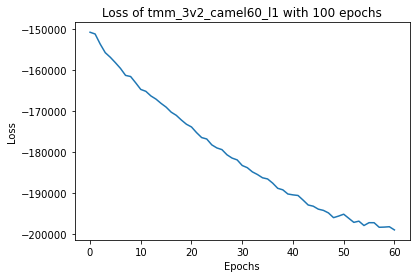

array([-150680.8125  , -151106.125   , -153566.09375 , -155681.796875,
       -156810.671875, -158132.796875, -159528.375   , -161237.015625,
       -161516.46875 , -163059.328125, -164671.1875  , -165133.90625 ,
       -166267.      , -167042.421875, -168085.609375, -169004.34375 ,
       -170236.09375 , -171009.390625, -172156.40625 , -173188.53125 ,
       -173856.25    , -175243.890625, -176449.      , -176794.90625 ,
       -178232.390625, -178985.375   , -179400.125   , -180667.84375 ,
       -181469.09375 , -181911.609375, -183284.984375, -183816.171875,
       -184841.921875, -185490.953125, -186288.109375, -186574.28125 ,
       -187590.859375, -188864.78125 , -189233.71875 , -190257.09375 ,
       -190469.546875, -190618.265625, -191748.453125, -192945.75    ,
       -193239.6875  , -193965.484375, -194262.640625, -194884.3125  ,
       -196044.9375  , -195658.015625, -195198.484375, -196195.796875,
       -197196.265625, -196903.140625, -197968.5625  , -197273.34375 ,
      

In [25]:
# #* Initialization of the model in an specific epoch
model.to(device)
epoch_init = 100
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay= weight_decay_)
#-----------------------------------------------------
model = final_model(model, optimizer, epoch_init, path_save, device=device)
plot_loss_epoch(model, path_save,data, epoch_init)
#loss = run_model_seq(x, y,model,optimizer,clip, path_save, n_epochs,save_every, print_every, epoch_init)


In [24]:
learning_rate = 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay= weight_decay_)
#-----------------------------------------------------
model = final_model(model, optimizer, epoch_init, path_save, device=device)
loss = run_model_seq(x, y,model,optimizer,clip, path_save, n_epochs,save_every, print_every, epoch_init)


Actual  path for to initialize our models:  C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models\tmm_3v2_camel60_l1
C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models\tmm_3v2_camel60_l1\tmm_3v2_state_40.pth
Initialization of the TMM_3v2 model  at epoch 40
loss: -149615.1875 and epoch: 40
The model is saved in this path C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models\tmm_3v2_camel60_l1\tmm_3v2


c:\Users\kmorales\Google Drive\PhD\Simulations_semi_super\utils\training.py:67: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  nn.utils.clip_grad_norm(model.parameters(), clip)


Loss Labeled: -46816.812500 	 Loss Unlabeled: -100485.132812
Loss Labeled: -46924.703125 	 Loss Unlabeled: -100827.109375
Loss Labeled: -48268.183594 	 Loss Unlabeled: -101972.539062
Loss Labeled: -49299.527344 	 Loss Unlabeled: -103089.781250
Loss Labeled: -50271.039062 	 Loss Unlabeled: -103280.828125
Loss Labeled: -51155.968750 	 Loss Unlabeled: -103741.398438
Loss Labeled: -51831.832031 	 Loss Unlabeled: -104492.976562
Loss Labeled: -52619.199219 	 Loss Unlabeled: -105444.570312
Loss Labeled: -52672.773438 	 Loss Unlabeled: -105718.445312
Loss Labeled: -53603.324219 	 Loss Unlabeled: -106353.523438
Loss Labeled: -54557.296875 	 Loss Unlabeled: -107038.296875
Loss Labeled: -54894.109375 	 Loss Unlabeled: -107206.273438
Loss Labeled: -55639.992188 	 Loss Unlabeled: -107640.859375
Loss Labeled: -55702.164062 	 Loss Unlabeled: -108373.593750
Loss Labeled: -56276.960938 	 Loss Unlabeled: -108889.656250
Loss Labeled: -56726.722656 	 Loss Unlabeled: -109389.070312
Loss Labeled: -57845.589

### Reconstruction image

In [26]:
# #* Reconstruction
y_ = model.reconstruction(x,y)
# y_ = model.sample(x,y).cpu()
y_pred_m = y_[np.where(y1 == -1)].numpy()
y_true_m = y_true[np.where(y1 == -1)]
error_rate = 1-accuracy_score(y_true_m, y_pred_m)
print(f'{name_image}: {model.__class__.__name__ } with  {num_param(model)} parameters \n after {epoch_init} has an error rate of {error_rate}\n folder {data}' )

camel60: TMM_3v2 with  1446 parameters 
 after 100 has an error rate of 0.054495566677675855
 folder tmm_3v2_camel60_l1


In [12]:
# #* Reconstruction
y_ = model.reconstruction(x,y)
# y_ = model.sample(x,y).cpu()
y_pred_m = y_[np.where(y1 == -1)].numpy()
y_true_m = y_true[np.where(y1 == -1)]
error_rate = 1-accuracy_score(y_true_m, y_pred_m)
print(f'{name_image}: {model.__class__.__name__ } with  {num_param(model)} parameters \n after {epoch_init} has an error rate of {error_rate}\n folder {data}' )

dog260: TMM_3 with  5346 parameters 
 after 55 has an error rate of 0.34290506200447246
 folder tmm_3_dog260_l1


## SVRNN

In [36]:
# Dimension of latent variables
z_dim = 1
h_dim = 14 # This value is not necessary for the TMM model
num_neurons = 14 #? == h_dim?
add_loss = True
#--------------------------------------------
#! Change here if the model is the same but with different parameters
learning_rate = 0.01
setting = '_l{}_11'.format(int(add_loss)) #* Change to '', '_1', '_2', etc. if the model is the same but with different parameters
#--------------------------------------------
model = SVRNN(x_dim, z_dim, h_dim, y_dim, num_neurons, device, add_loss)

### Execution

In [37]:
#--------------------------------------------
# Save models
#--------------------------------------------
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay= weight_decay_)
print(f'{model.__class__.__name__ } has {num_param(model)} parameters to train' )
print(f'z_dim = {z_dim}, num_neurons = {num_neurons}, h_dim = {h_dim}')
data = model.__class__.__name__.casefold()+'_'+name_image+setting
path_save = os.path.join(general_path, data)
if not os.path.exists(path_save):
    os.makedirs(path_save)
print(f'Actual path to save our models for {data} is \n {path_save} ')


SVRNN has 1492 parameters to train
z_dim = 1, num_neurons = 14, h_dim = 14
Actual path to save our models for svrnn_camel60_l1_11 is 
 C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models\svrnn_camel60_l1_11 


In [39]:
def run_model_seq(x, y,model,optimizer,clip, path_save_model, n_epochs,save_every=5, print_every=1, epoch_init=1):
    train_LOSS = []
    path_save = os.path.join(path_save_model, model.__class__.__name__.casefold() +'_state_')
    print('The model is saved in this path', os.path.join(path_save_model, model.__class__.__name__.casefold()))
    for epoch in range(epoch_init, n_epochs + 1):
        #training
        # if  model.__class__.__name__.casefold() == 'svrnn':
        #     kld_loss_l, rec_loss_l, y_loss_l, kld_loss_u, rec_loss_u, y_loss_u = model(x,y)
        #     loss_l = kld_loss_l + rec_loss_l + y_loss_l
        #     loss_u = kld_loss_u + rec_loss_u + y_loss_u        
        #     loss = loss_l + loss_u
        if  model.__class__.__name__.casefold() == 'vsl':
            kld_loss_u, rec_loss_u, y_loss_l = model(x,y)
            loss_l = y_loss_l
            loss_u = kld_loss_u + rec_loss_u        
            loss = loss_l + beta*loss_u
        else:
            # 'svrnn_2' "tmm" all versions
            kld_loss_l, rec_loss_l, y_loss_l, kld_loss_u, rec_loss_u, y_loss_u, add_term= model(x,y)
            loss_l = kld_loss_l + rec_loss_l + y_loss_l
            loss_u = kld_loss_u + rec_loss_u + y_loss_u        
            loss = loss_l + loss_u + alpha*add_term

        loss.backward()
        nn.utils.clip_grad_norm(model.parameters(), clip)
        optimizer.step()
        train_LOSS.append(loss.item())

        if epoch % print_every == 0:
            print('Loss Labeled: {:.6f} \t Loss Unlabeled: {:.6f}'.format(
                    loss_l, loss_u))     
            # print('\n kdl_loss_l: {:.4f} \t rec_loss_l: {:.4f} \t y_loss_l: {:.4f}'.format(kld_loss_l, rec_loss_l, y_loss_l))
            # print('\n kdl_loss_u: {:.4f} \t rec_loss_u: {:.4f} \t y_loss_u: {:.4f}'.format(kld_loss_u.item(), rec_loss_u.item(), y_loss_u.item()))
            
        if epoch % save_every == 0:
            fn = path_save+str(epoch)+'.pth'
            torch.save({
                        'epoch': epoch,
                        'model_state_dict': model.state_dict(),
                        'optimizer_state_dict': optimizer.state_dict(),
                        'loss': loss,
                        }, fn)
            #torch.save(model.state_dict(), fn)
            # print('Saved model to '+fn)
            np.save(path_save+'train_'+str(epoch)+'.npy', train_LOSS)     
    return train_LOSS



In [40]:
#* Training
loss = run_model_seq(x, y,model,optimizer,clip, path_save, n_epochs,save_every, print_every)

The model is saved in this path C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models\svrnn_camel60_l1_11\svrnn


NameError: name 'alpha' is not defined

In [11]:
#* Training
loss = run_model_seq(x, y,model,optimizer,clip, path_save, n_epochs,save_every, print_every)

The model is saved in this path C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models\svrnn_2_camel40_l1_11\svrnn_2


c:\Users\kmorales\Google Drive\PhD\Simulations_semi_super\utils\training.py:46: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  nn.utils.clip_grad_norm(model.parameters(), clip)


Loss Labeled: -14616.144531 	 Loss Unlabeled: -27570.970703
Loss Labeled: -19358.306641 	 Loss Unlabeled: -30540.593750
Loss Labeled: -22835.601562 	 Loss Unlabeled: -32750.748047
Loss Labeled: -25460.154297 	 Loss Unlabeled: -34414.789062
Loss Labeled: -27944.664062 	 Loss Unlabeled: -35979.632812
Loss Labeled: -30519.986328 	 Loss Unlabeled: -37572.585938
Loss Labeled: -32971.648438 	 Loss Unlabeled: -39068.500000
Loss Labeled: -34942.226562 	 Loss Unlabeled: -40284.328125
Loss Labeled: -36492.562500 	 Loss Unlabeled: -41270.707031
Loss Labeled: -38252.773438 	 Loss Unlabeled: -42421.136719
Loss Labeled: -40773.789062 	 Loss Unlabeled: -44039.339844
Loss Labeled: -44501.796875 	 Loss Unlabeled: -46280.308594
Loss Labeled: -49127.273438 	 Loss Unlabeled: -49004.101562
Loss Labeled: -54179.046875 	 Loss Unlabeled: -51987.312500
Loss Labeled: -59327.335938 	 Loss Unlabeled: -55330.847656
Loss Labeled: -64201.195312 	 Loss Unlabeled: -59061.304688
Loss Labeled: -69525.890625 	 Loss Unlab

Actual  path for to initialize our models:  C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models\svrnn_2_camel40_l1_11
C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models\svrnn_2_camel40_l1_11\svrnn_2_state_100.pth
Initialization of the SVRNN_2 model  at epoch 100
loss: -195685.953125 and epoch: 100


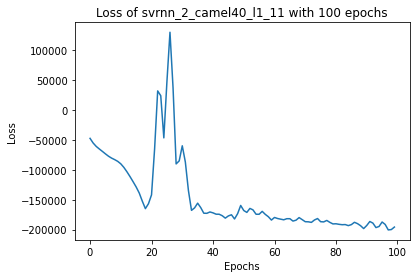

In [13]:
# #* Initialization of the model in an specific epoch
model.to(device)
epoch_init = 100
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay= weight_decay_)
#-----------------------------------------------------
model = final_model(model, optimizer, epoch_init, path_save, device)
loss = plot_loss_epoch(model, path_save,data, epoch_init)
# # loss = run_model_seq(x, y,model,optimizer,clip, path_save, n_epochs,save_every, print_every, epoch_init)


In [14]:
# #* Reconstruction
y_ = model.reconstruction(x,y)
y_pred_m = y_[np.where(y1 == -1)].numpy()
y_true_m = y_true[np.where(y1 == -1)]
error_rate = 1-accuracy_score(y_true_m, y_pred_m)
print(f'{name_image}: {model.__class__.__name__ } with  {num_param(model)} parameters \n after {epoch_init} has an error rate of {error_rate}\n folder {data}' )

camel40: SVRNN_2 with  5240 parameters 
 after 100 has an error rate of 0.12123190353673052
 folder svrnn_2_camel40_l1_11


# Other Code
Creation missing labels and plots

In [ ]:
#-------------------------------
# Change the name to create or load the data and models

folder_data = r'C:\Users\kmorales\Google Drive\PhD\Simulations_semi_super\Data\data_mlsp_semi'


x_list = []
y_list = []
# y_list_40 = []
# y_list_60 = []
# y_list_80 = []
# y_list_100 = []


for img in sorted(os.listdir(folder_data)):
    if img.startswith('x'):
        x_list.append(plt.imread(os.path.join(folder_data, img)))
    if img.startswith('y') and not img.endswith('npy'):
        y = plt.imread(os.path.join(folder_data, img))
        y_list.append(y)
        # Only if we want to create the missing labels for different probabilities
#         for p in probabilities:
#             if p == 0.4:
#                 y_list_40.append(create_missing_labels(y, p))
#             elif p == 0.6:
#                 y_list_60.append(create_missing_labels(y, p))
#             elif p == 0.8:
#                 y_list_80.append(create_missing_labels(y, p))
#             elif p == 1:
#                 y_list_100.append(create_missing_labels(y, p))
        
# np.save(os.path.join(general_path, folder_data, 'y_miss_40.npy'), y_list_40)
# np.save(os.path.join(general_path, folder_data, 'y_miss_60.npy'), y_list_60)
# np.save(os.path.join(general_path, folder_data, 'y_miss_80.npy'), y_list_80)
# np.save(os.path.join(general_path, folder_data, 'y_miss_100.npy'), y_list_100)

# Load the created data 
y_list_40 = np.load(os.path.join(general_path, folder_data, 'y_miss_40.npy'))
y_list_60 = np.load(os.path.join(general_path, folder_data, 'y_miss_60.npy'))
y_list_80 = np.load(os.path.join(general_path, folder_data, 'y_miss_80.npy'))
y_list_100 = np.load(os.path.join(general_path, folder_data, 'y_miss_100.npy'))

In [ ]:

fig = plt.figure(figsize=(20, 30))  
rows = len(x_list)
columns = 6
m, n = x_list[0].shape


for i, (x,y, y1,y2,y3, y4) in enumerate(zip(x_list, y_list, y_list_40, y_list_60, y_list_80, y_list_100)):
    print(x.shape)
    fig.add_subplot(rows, columns, columns*i+1)
    x[m-1, n-1] = -1
    plt.imshow(x, cmap='gray')
    plt.title('Image  idex {}'.format(i))
    #plt.axis('off')
    fig.add_subplot(rows, columns, columns*i+2)
    y[m-1, n-1] = -1
    plt.imshow(y, cmap='gray')
    #plt.axis('off')
    fig.add_subplot(rows, columns, columns*i+3)
    plt.imshow(y1, cmap='gray')
    #plt.axis('off')
    fig.add_subplot(rows, columns, columns*i+4)
    plt.imshow(y2, cmap='gray')
    #plt.axis('off')
    fig.add_subplot(rows, columns, columns*i+5)
    plt.imshow(y3, cmap='gray')
    #plt.axis('off')
    fig.add_subplot(rows, columns, columns*i+6)
    plt.imshow(y4, cmap='gray')



In [ ]:
print('{} has {} parameters to train'.format(model.__class__.__name__ ,num_param(model)) )

In [ ]:
y_ = model.sample(x,y)
image_complete = y_.clone().detach().numpy().reshape(m,n)
image_complete[m-1,n-1] = -1
image_labeled = y_list[idx].copy()
image_labeled[m-1,n-1] = -1
plt.imshow(x_list[idx])
plt.show()
plt.imshow(image_complete)
plt.show()
plt.imshow(image_labeled)
plt.show()
plt.imshow(y_list_80[idx])
plt.show()


unique, counts = np.unique(y_true, return_counts=True)
print(unique, counts)
unique, counts = np.unique(y_pred, return_counts=True)
print(unique, counts)